In [1]:
import pandas as pd
import numpy as np
import keras.backend as K
import matplotlib.pyplot as plt
from scipy.misc import imshow
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.models import model_from_json

%matplotlib inline




Using TensorFlow backend.


In [2]:

data = pd.read_csv("training.csv")
data = data.dropna()
data['Image'] = data['Image'].apply(lambda x: list(map(int, x.split(" "))))

data['Image'] = data['Image'].apply(lambda x: np.reshape(np.array(x), (96,96,1)))


In [3]:
X = list(data['Image'])
X = np.array(X).astype('float32')
print(X.shape)


y = data.drop('Image', axis=1).as_matrix().astype('float32')
print(y.shape)


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15)

(2140, 96, 96, 1)
(2140, 30)


In [4]:
input_shape = (96, 96, 1)
num_classes = 30

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='linear'))

In [5]:
model.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['mse'])

In [6]:
batch_size = 128
epochs = 1000

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, y_test))

In [7]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 21.2946525407
Test accuracy: 21.2946525407


In [8]:
first_test = X_test[0].copy()
first_test = first_test.reshape(1,96,96,1)
preds = np.clip(model.predict(first_test),0,255).astype('uint8')[0]
print(preds)


[60 33 27 34 53 34 66 34 33 34 21 34 50 26 72 27 36 27 15 28 43 52 58 69 31
 69 44 66 44 75]


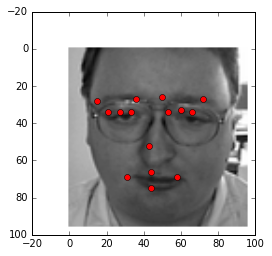

In [9]:
plt.figure()

plt.imshow(first_test.reshape((96,96)), cmap="gray")

for i in range(0,len(preds),2):
    plt.plot(preds[i],preds[i+1], marker='o', color='r', ls='')
plt.show()

In [10]:
model.save_weights("cnn_point.h5")
model_json = model.to_json()
with open("cnn_point_model.json", "w") as json_file:
    json_file.write(model_json)